In [5]:
# Loading Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv("heart.csv")
col_names = list(df.columns)

In [6]:
feature_cols = col_names[:13]
X = df[feature_cols]
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [3]:
en = []
for i in range(5,20):
    for j in range(5,13):
        clf = DecisionTreeClassifier(criterion = "entropy",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X_train,y_train)
        y1_pred = clf.predict(X_test)
        en.append(tuple([i,j,metrics.accuracy_score(y_test,y1_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [4]:
max(en,key=lambda item:item[2])

(5, 11, 0.8131868131868132)

In [5]:
gini = []
for i in range(5,20):
    for j in range(5,13):
        clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = i,max_features = j)
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
        clf = clf.fit(X_train,y_train)
        y1_pred = clf.predict(X_test)
        gini.append(tuple([i,j,metrics.accuracy_score(y_test,y1_pred)]))
        #print("Accuracy:",metrics.accuracy_score(y_test,y1_pred))

In [6]:
max(gini,key=lambda item:item[2])

(8, 5, 0.8021978021978022)

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [8]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = feature_cols,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')

True

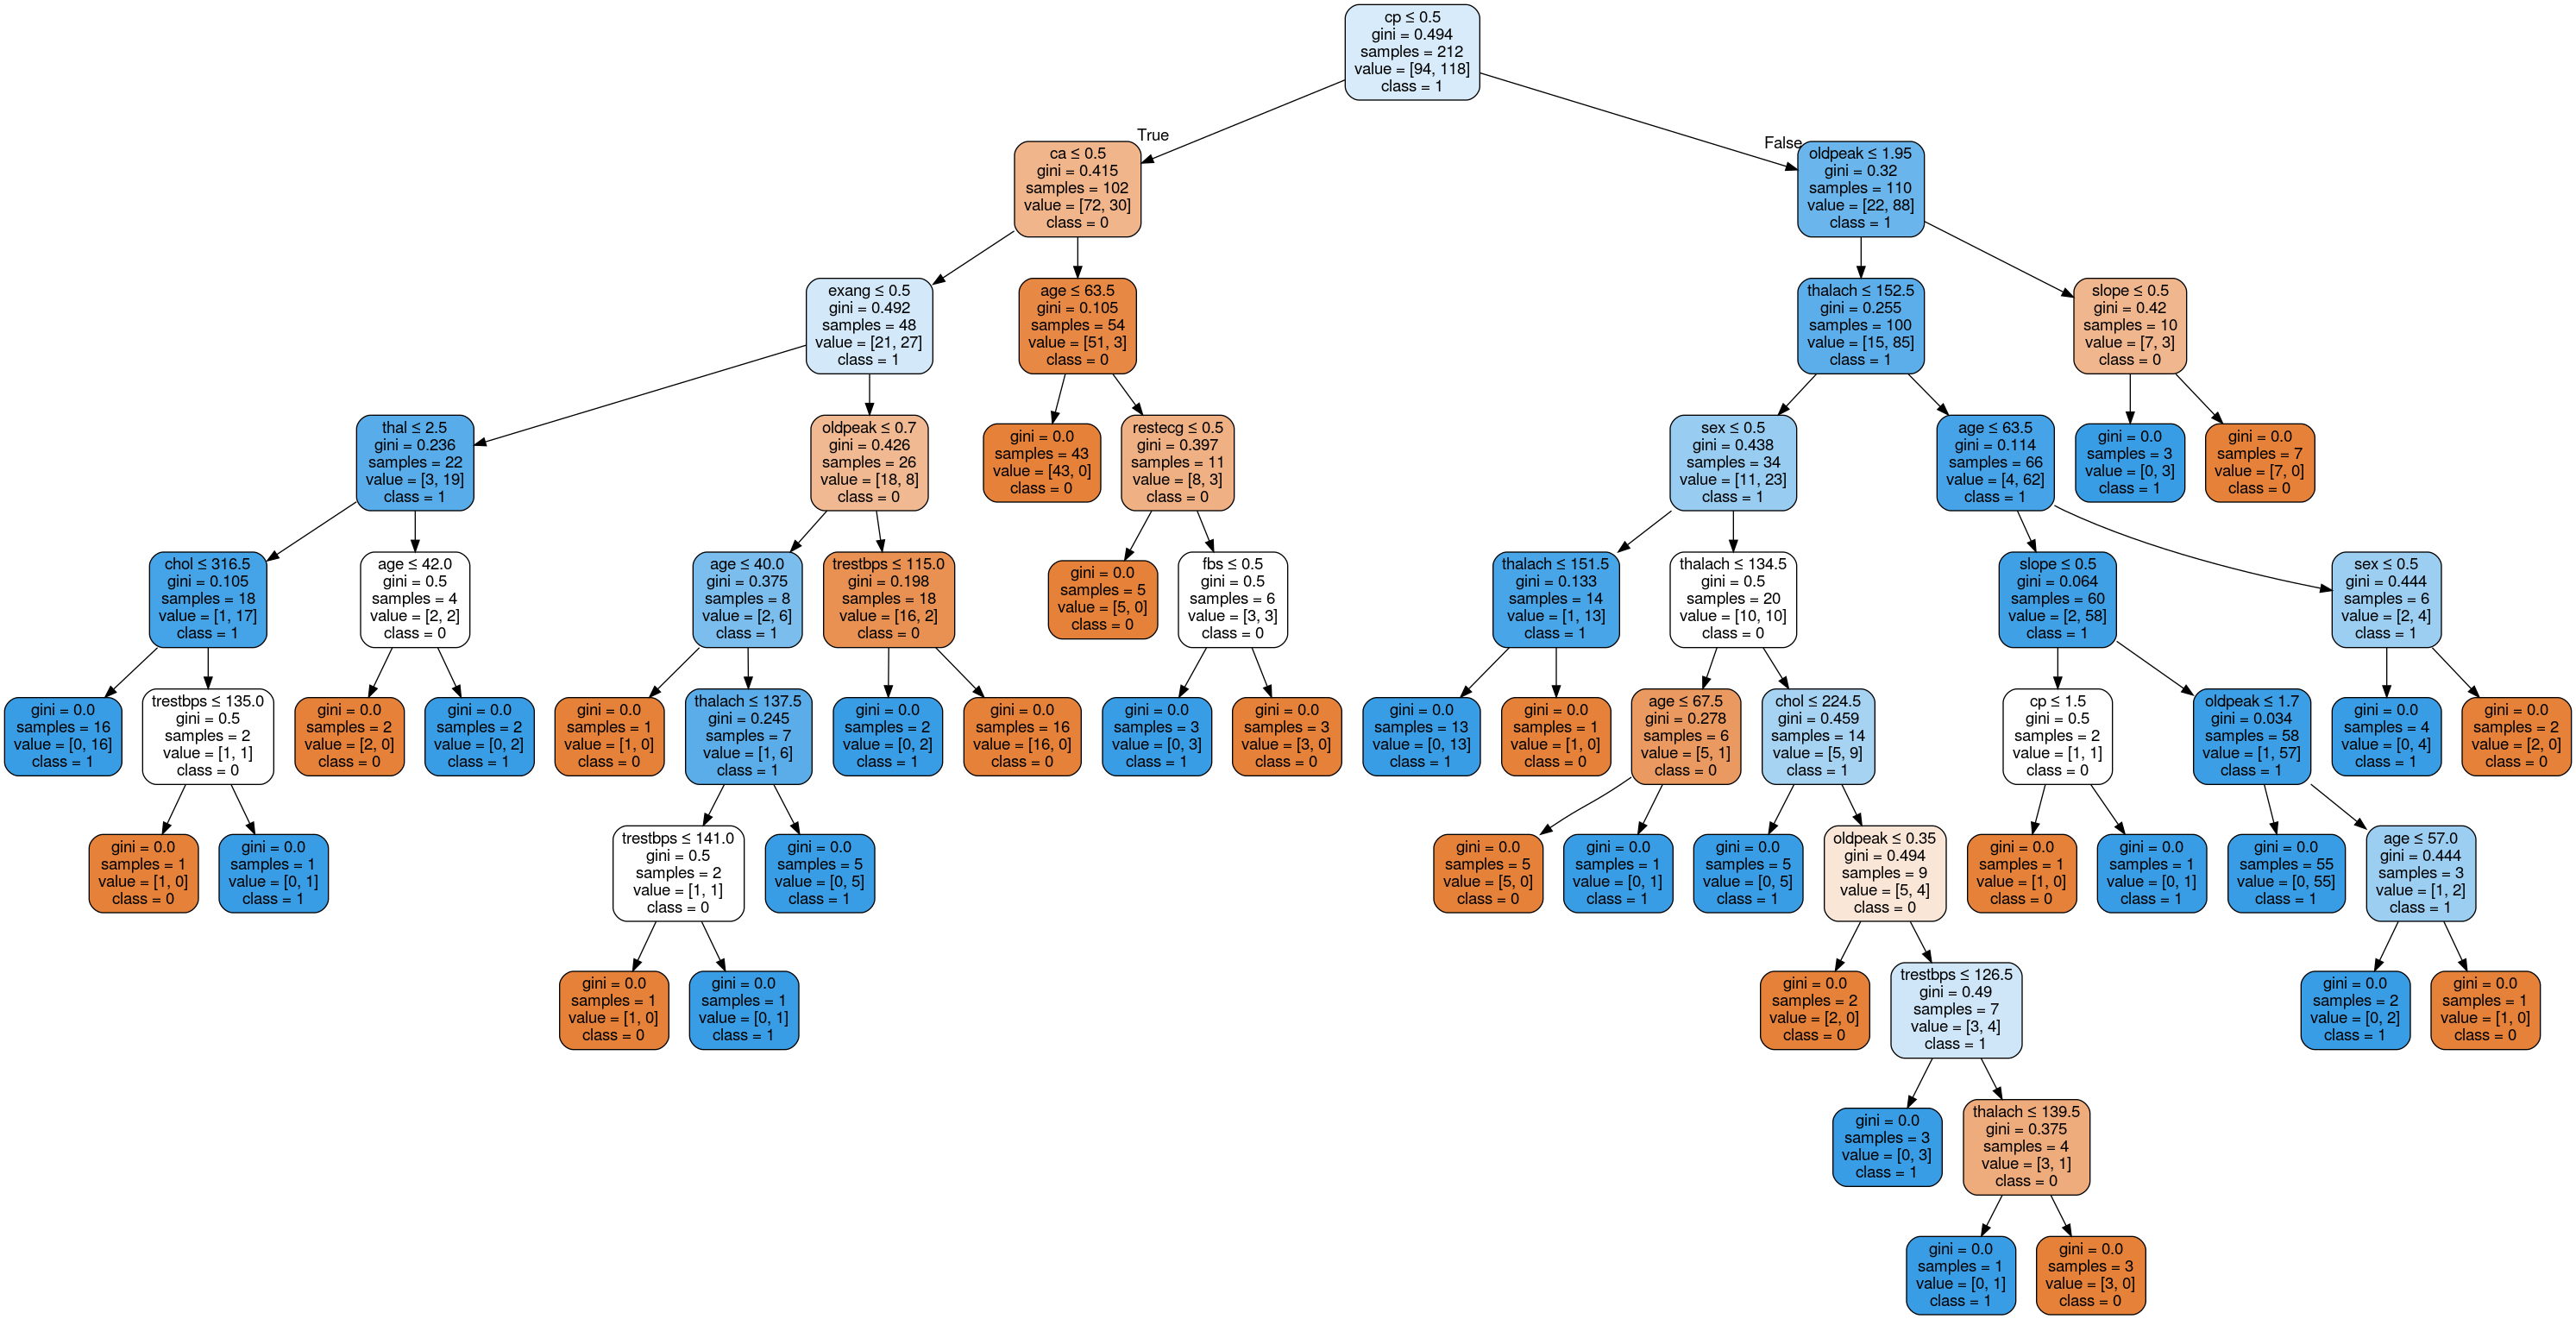

In [9]:
Image(graph.create_png())

In [14]:
from sklearn.tree import _tree
import numpy as np
d = {0 : "no chance of heart disease",1: "chance of heart disease"}
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            val = np.argmax(tree_.value[node][0])
            print("{}return {}".format(indent,d[val]))

    recurse(0, 1)

In [8]:
features = ['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']

In [9]:
X3 = df[features]
y3 = df.target
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.3,random_state = 0)

In [10]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 5,max_features = 4)

#using max_depth = 6 increased the acuracy to 80

#using max_features = 8 remains same as 80

#using max_features = 11 and max_depth = 5 increased the accuracy to 80 
clf = clf.fit(X3_train,y3_train) 
y3_pred = clf.predict(X3_test) 
print("Accuracy:",metrics.accuracy_score(y3_test,y3_pred))

Accuracy: 0.8351648351648352


In [15]:
tree_to_code(clf,features)

def tree(thal, thalach, slope, exang, cp, oldpeak, ca, sex):
    if thal <= 2.5:
        if ca <= 0.5:
            if oldpeak <= 1.699999988079071:
                if sex <= 0.5:
                    if cp <= 0.5:
                        return chance of heart disease
                    else:  # if cp > 0.5
                        return chance of heart disease
                else:  # if sex > 0.5
                    if cp <= 1.5:
                        return chance of heart disease
                    else:  # if cp > 1.5
                        return chance of heart disease
            else:  # if oldpeak > 1.699999988079071
                if cp <= 2.5:
                    if thalach <= 173.5:
                        return no chance of heart disease
                    else:  # if thalach > 173.5
                        return chance of heart disease
                else:  # if cp > 2.5
                    return chance of heart disease
        else:  # if ca > 0.5
            

# After pruning tree

In [4]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 0,max_depth = 6,max_features = 3,max_leaf_nodes = 19,min_samples_leaf = 2 )
## using max_depth = 6 increased the acuracy to 80
# using max_features = 8 remains same as 80
clf = clf.fit(X3_train,y3_train)
y3_pred = clf.predict(X3_test)
                #gini.append(tuple([i,j,k,l,metrics.accuracy_score(y3_test,y3_pred)]))
print("Accuracy:",metrics.accuracy_score(y3_test,y3_pred))

NameError: name 'DecisionTreeClassifier' is not defined

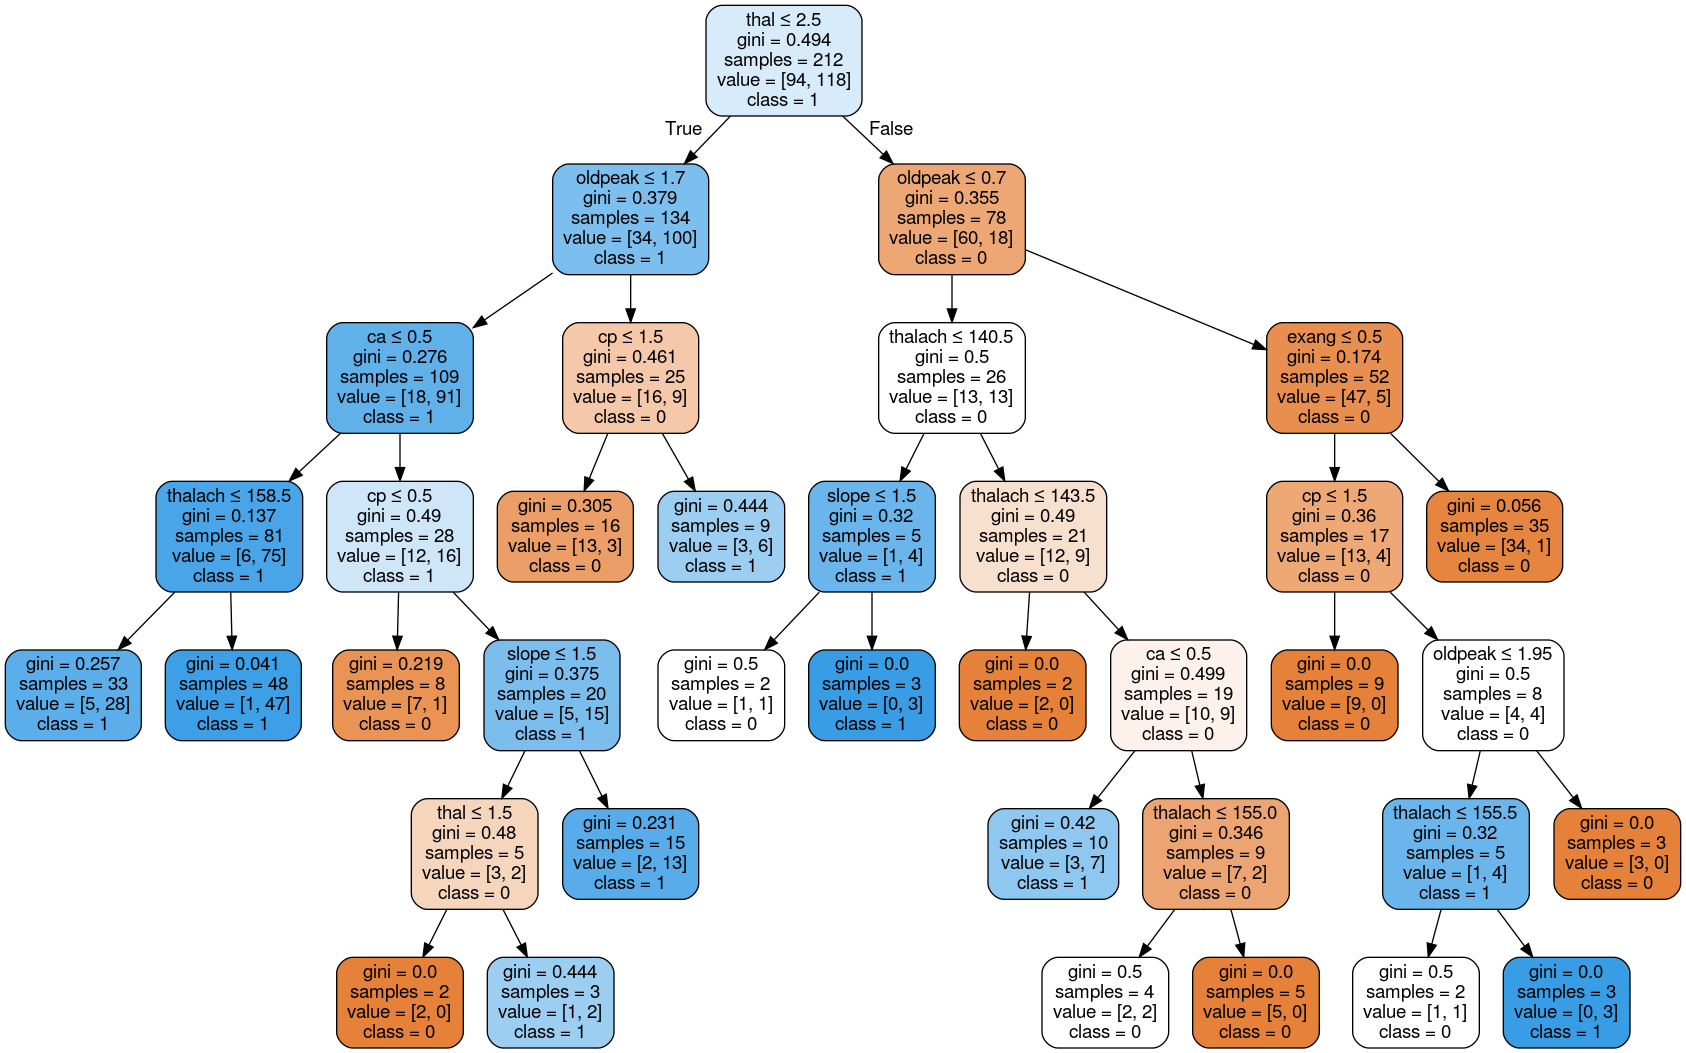

In [16]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True , rounded = True , special_characters = True ,feature_names = features,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart84.png')
Image(graph.create_png())

In [3]:
tree_to_code(clf,features)

NameError: name 'clf' is not defined

# Accuracy of 84.6 % for gini

In [30]:
print(clf.score(X3_train,y3_train))

0.8867924528301887


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y3_test,y3_pred))
print(classification_report(y3_test,y3_pred))

[[35  9]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



In [24]:
features

['thal', 'thalach', 'slope', 'exang', 'cp', 'oldpeak', 'ca', 'sex']

In [1]:
 from sklearn.model_selection import cross_val_score

In [26]:
l = cross_val_score(clf,X3_train,y3_train, cv=10)

In [29]:
import numpy as np
np.mean(l)

0.7022222222222222

In [28]:
l = cross_val_score(clf,X3_test,y3_test, cv=10)

In [1]:
def tree(thal, thalach, slope, exang, cp, oldpeak, ca, sex):
    if thal <= 2.5:
        if ca <= 0.5:
            if oldpeak <= 1.699999988079071:
                if sex <= 0.5:
                    if cp <= 0.5:
                        return chance of heart disease
                    else:  # if cp > 0.5
                        return chance of heart disease
                    else:  # if sex > 0.5
                        if cp <= 1.5:
                            return chance of heart disease
                        else:  # if cp > 1.5
                            return chance of heart disease
      else:  # if oldpeak > 1.699999988079071
        if cp <= 2.5:
          if thalach <= 173.5:
            return no chance of heart disease
          else:  # if thalach > 173.5
            return chance of heart disease
        else:  # if cp > 2.5
          return chance of heart disease
    else:  # if ca > 0.5
      if slope <= 1.5:
        if exang <= 0.5:
          if oldpeak <= 0.75:
            return chance of heart disease
          else:  # if oldpeak > 0.75
            return no chance of heart disease
        else:  # if exang > 0.5
          return no chance of heart disease
      else:  # if slope > 1.5
        if cp <= 0.5:
          if sex <= 0.5:
            return chance of heart disease
          else:  # if sex > 0.5
            return no chance of heart disease
        else:  # if cp > 0.5
          if ca <= 1.5:
            return chance of heart disease
          else:  # if ca > 1.5
            return chance of heart disease
  else:  # if thal > 2.5
    if oldpeak <= 0.7000000178813934:
      if cp <= 0.5:
        if ca <= 0.5:
          if slope <= 1.5:
            return no chance of heart disease
          else:  # if slope > 1.5
            return chance of heart disease
        else:  # if ca > 0.5
          if oldpeak <= 0.15000000223517418:
            return no chance of heart disease
          else:  # if oldpeak > 0.15000000223517418
            return no chance of heart disease
      else:  # if cp > 0.5
        if thalach <= 152.0:
          if thalach <= 148.5:
            return chance of heart disease
          else:  # if thalach > 148.5
            return no chance of heart disease
        else:  # if thalach > 152.0
          return chance of heart disease
    else:  # if oldpeak > 0.7000000178813934
      if thalach <= 150.5:
        return "no chance of heart disease"
      else:  # if thalach > 150.5
        if ca <= 1.5:
          if cp <= 1.5:
            return "no chance of heart disease"
          else:  # if cp > 1.5
            return "chance of heart disease"
        else:  # if ca > 1.5
          return "no chance of heart disease"

SyntaxError: invalid syntax (<ipython-input-1-8442e2beba99>, line 7)